### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:

_User Attributes_
- Gender: male, female
- Age: below 21, 21 to 25, 26 to 30, etc.
- Marital Status: single, married partner, unmarried partner, or widowed
- Number of children: 0, 1, or more than 1
- Education: high school, bachelors degree, associates degree, or graduate degree
- Occupation: architecture & engineering, business & financial, etc.
- Annual income: less than \\$12500, \\$12500- \\$24999, \\$25000- \\$37499, etc.
- Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
- Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
- Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
- Number of times that he/she eats at a restaurant with average expense less than \\$20 per person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
- Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

_Contextual Attributes_
- Driving destination: home, work, or no urgent destination
- Location of user, coupon and destination: we provide a map to show the geographical location of the user, destination, and the venue, and we mark the distance between each two places with time of driving. The user can see whether the venue is in the same direction as the destination.
- Weather: sunny, rainy, or snowy
- Temperature: 30F, 55F, or 80F
- Time: 10AM, 2PM, or 6PM
- Passenger: alone, partner, kid(s), or friend(s)

_Coupon Attributes_
- Time before it expires: 2 hours or one day

In [515]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [518]:
data = pd.read_csv('data/coupons.csv')

In [520]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [523]:
# Let's examine each column and see where that takes us
for col in data.columns:
    print(f'Looking at the {col} column...')
    print(data[col].value_counts())
    numMissing = data[col].isnull().sum()
    print(f'There are {numMissing} out of {data.shape[0]} entries missing.\n')

Looking at the destination column...
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
There are 0 out of 12684 entries missing.

Looking at the passanger column...
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
There are 0 out of 12684 entries missing.

Looking at the weather column...
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
There are 0 out of 12684 entries missing.

Looking at the temperature column...
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
There are 0 out of 12684 entries missing.

Looking at the time column...
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
There are 0 out of 12684 entries missing.

Looking at the coupon column...
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                 

In [525]:
# Restructure some of the survey responses

# 'None' just seems like a more intuitive response to this prompt
data['passanger'] = data['passanger'].str.replace('Alone', 'None')

# Tidy up the age groups - e.g. '21' is not as clear as '21 to 25'
data['age'] = data['age'].str.replace('21', '21 to 25')
data['age'] = data['age'].str.replace('26', '26 to 30')
data['age'] = data['age'].str.replace('31', '31 to 35')
data['age'] = data['age'].str.replace('36', '36 to 40')
data['age'] = data['age'].str.replace('41', '41 to 45')
data['age'] = data['age'].str.replace('46', '46 to 50')
data['age'] = data['age'].str.replace('50plus', 'Above 50')
data['age'] = data['age'].str.replace('below21 to 25', 'Under 21') # the first replace for age makes this one a bit funky

# Tidy up the education groups - the main change here is to combine the 
#'High School Graduate' and 'Some High School' entries into one
data['education'] = data['education'].str.replace('Some college - no degree', 'College Dropout')
data['education'] = data['education'].str.replace('Bachelors degree', 'Undergraduate Degree')
data['education'] = data['education'].str.replace('Graduate degree (Masters or Doctorate)', 'Graduate Degree')
data['education'] = data['education'].str.replace('Associates degree', 'Associate Degree')
data['education'] = data['education'].str.replace('Some High School', 'High School Graduate')

data['occupation'] = data['occupation'].str.replace('Education&Training&Library', 'Education & Training & Library')

# Tidy up the visit groups - the main change being to combine 'never' and 'less1' into '0'
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    data[col] = data[col].str.replace('never', '0')
    data[col] = data[col].str.replace('less1', '0')
    data[col] = data[col].str.replace('1~3', '1 to 3')
    data[col] = data[col].str.replace('4~8', '4 to 8')
    data[col] = data[col].str.replace('gt8', '9 or more')

# Switch from numeric data to 'Yes'/'No'
for col in ['has_children', 'Y', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']:
    data[col] = data[col].astype(str)
    data[col] = data[col].str.replace('1', 'Yes')
    data[col] = data[col].str.replace('0', 'No')

# Combine three toCoupon_* columns into a more helpful single column
def combine_distance(row):
    if (row['toCoupon_GEQ25min'] == 'Yes'):
        return '25 minutes or more'
    elif (row['toCoupon_GEQ15min'] == 'Yes'):
        return '15 to 24:59 minutes'
    else:
        return '5 to 14:59 minutes'
data['couponDistance'] = data.apply(combine_distance, axis = 1)

# Combine the two direction_* columns into one for simplicity's sake
def combine_direction(row):
    if (row['direction_opp'] == 'Yes'):
        return 'Opposite'
    elif (row['direction_same'] == 'Yes'):
        return 'Same'
data['couponDirection'] = data.apply(combine_direction, axis = 1)

In [526]:
# Tidy up some of the column names
data = data.rename(columns = {
    'passanger': 'passenger',
    'Y': 'acceptedCoupon',
    'has_children': 'hasChildren',
    'Bar': 'barVisits',
    'CoffeeHouse': 'coffeeHouseVisits',
    'CarryAway': 'foodPickups',
    'RestaurantLessThan20': 'restaurantUnder20Visits',
    'Restaurant20To50': 'restaurant20To50Visits',
    'coupon': 'couponType'
})


3. Decide what to do about your missing data -- drop, replace, other...

In [530]:
# Drop duplicate rows
data = data.drop_duplicates(keep = 'first')

In [532]:
# Drop rows that have missing data for the Bar, CoffeeHouse, CarryAway, RestaurantLessThan20,
# and Restaurant20To50 columns, since there are very few of those that have missing data
# compared to our overall dataset
data = data.dropna(subset = ['barVisits', 'coffeeHouseVisits', 'foodPickups', 'restaurantUnder20Visits', 'restaurant20To50Visits'])

In [534]:
# Drop the car column since a very small portion of the survey takers provided that info
# and it doesn't seem like any of the other data can be used to infer a value for it
data = data.drop(columns = ['car'])

In [536]:
# Drop the columns we replaced with new columns
data = data.drop(columns = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'])
data = data.drop(columns = ['direction_opp', 'direction_same'])

4. What proportion of the total observations chose to accept the coupon?



In [539]:
data.head()

,destination,passenger,weather,temperature,time,couponType,expiration,gender,age,maritalStatus,...,occupation,income,barVisits,coffeeHouseVisits,foodPickups,restaurantUnder20Visits,restaurant20To50Visits,acceptedCoupon,couponDistance,couponDirection
22,No Urgent Place,None,Sunny,55,2PM,Restaurant(<20),1d,Male,21 to 25,Single,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,Yes,5 to 14:59 minutes,Opposite
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21 to 25,Single,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,No,5 to 14:59 minutes,Opposite
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21 to 25,Single,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,Yes,5 to 14:59 minutes,Opposite
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21 to 25,Single,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,No,15 to 24:59 minutes,Opposite
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21 to 25,Single,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,No,5 to 14:59 minutes,Opposite


In [541]:
# Note: this percentage is calculated using the cleaned dataset, and not the original one
acceptanceRate = data.query("acceptedCoupon == 'Yes'").shape[0] / data.shape[0]
print(f'{round(acceptanceRate * 100, 2)}% of survey takers chose to accept the coupon.')

56.82% of survey takers chose to accept the coupon.


5. Use a bar plot to visualize the `couponType` column.

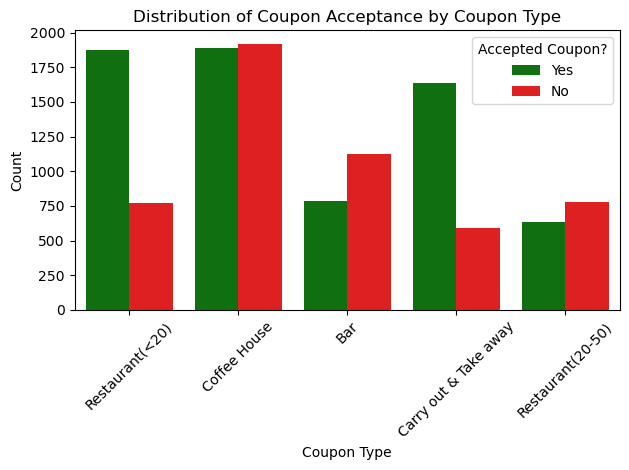

In [544]:
# Alright, now that the data is looking good... let's plot a histogram of how many people accepted their coupon
sns.countplot(data, x = 'couponType', hue = 'acceptedCoupon', palette={"Yes": "green", "No": "red"})
plt.title(f'Distribution of Coupon Acceptance by Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon?')
plt.savefig('images/coupon-acceptance-by-type.png')

6. Use a histogram to visualize the temperature column.

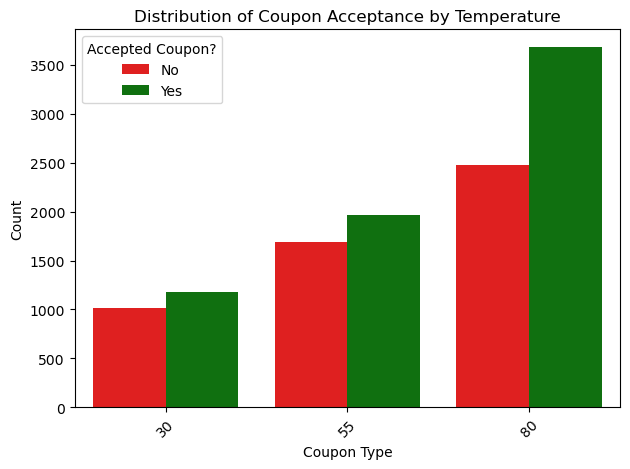

In [547]:
# Using countplot instead of displot because temperature is discrete in this dataset
sns.countplot(data, x = 'temperature', hue = 'acceptedCoupon', palette={"Yes": "green", "No": "red"})
plt.title(f'Distribution of Coupon Acceptance by Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon?')
plt.savefig('images/coupon-acceptance-by-temperature.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [550]:
bars = data.query("couponType == 'Bar'")
bars.head()

,destination,passenger,weather,temperature,time,couponType,expiration,gender,age,maritalStatus,...,occupation,income,barVisits,coffeeHouseVisits,foodPickups,restaurantUnder20Visits,restaurant20To50Visits,acceptedCoupon,couponDistance,couponDirection
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21 to 25,Single,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,Yes,5 to 14:59 minutes,Opposite
35,Home,None,Sunny,55,6PM,Bar,1d,Male,21 to 25,Single,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,Yes,5 to 14:59 minutes,Same
39,Work,None,Sunny,55,7AM,Bar,1d,Male,21 to 25,Single,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,Yes,25 minutes or more,Opposite
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46 to 50,Single,...,Student,$12500 - $24999,0,4 to 8,1 to 3,1 to 3,0,No,5 to 14:59 minutes,Opposite
57,Home,None,Sunny,55,6PM,Bar,1d,Male,46 to 50,Single,...,Student,$12500 - $24999,0,4 to 8,1 to 3,1 to 3,0,No,5 to 14:59 minutes,Same


2. What proportion of bar coupons were accepted?


In [553]:
acceptanceRate = bars.query("acceptedCoupon == 'Yes'").shape[0] / bars.shape[0]
print(f'{round(acceptanceRate * 100, 2)}% of survey takers chose to accept the bar coupon when offered it.')

41.12% of survey takers chose to accept the bar coupon when offered it.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [556]:
data['barVisits'].value_counts()

barVisits
0            8253
1 to 3       2365
4 to 8       1049
9 or more     326
Name: count, dtype: int64

In [558]:
print('Looking only at survey takers who went to the bar 3 or fewer times a month...')
barsAtMostThrice = bars.query("barVisits.isin(['0', '1 to 3'])")
acceptanceRateForAtMostThrice = barsAtMostThrice.query("acceptedCoupon == 'Yes'").shape[0] / barsAtMostThrice.shape[0]
print(f'{round(acceptanceRateForAtMostThrice * 100, 2)}% of those who were offered bar coupons chose to accept them.')

Looking only at survey takers who went to the bar 3 or fewer times a month...
37.17% of those who were offered bar coupons chose to accept them.


In [560]:
print('Looking only at survey takers who went to the bar 4 or more times a month...')
barsFourOrMore = bars.query("barVisits.isin(['4 to 8', '9 or more'])")
acceptanceRateForFourOrMore = barsFourOrMore.query("acceptedCoupon == 'Yes'").shape[0] / barsFourOrMore.shape[0]
print(f'{round(acceptanceRateForFourOrMore * 100, 2)}% of those who were offered bar coupons chose to accept them.')
print("That's almost double the rate for those who go 3 or fewer times a month.")

Looking only at survey takers who went to the bar 4 or more times a month...
76.17% of those who were offered bar coupons chose to accept them.
That's almost double the rate for those who go 3 or fewer times a month.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [563]:
data['age'].value_counts()

age
21 to 25    2526
26 to 30    2374
31 to 35    1906
Above 50    1725
36 to 40    1251
41 to 45    1061
46 to 50     648
Under 21     502
Name: count, dtype: int64

In [565]:
print('Looking only at survey takers who went to the bar more than once a month and are over the age of 25...')
barsMoreThanOnceAndOver25 = bars.query("(barVisits != '0') and not age.isin(['21 to 25', 'Under 21'])")
acceptanceRateMoreThanOnceAndOver25 = barsMoreThanOnceAndOver25.query("acceptedCoupon == 'Yes'").shape[0] / barsMoreThanOnceAndOver25.shape[0]
print(f'{round(acceptanceRateMoreThanOnceAndOver25 * 100, 2)}% of those who were offered bar coupons chose to accept them.')

Looking only at survey takers who went to the bar more than once a month and are over the age of 25...
68.98% of those who were offered bar coupons chose to accept them.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [568]:
data['passenger'].value_counts()

passenger
None         6903
Friend(s)    3139
Partner      1018
Kid(s)        933
Name: count, dtype: int64

In [570]:
data['occupation'].value_counts()

occupation
Unemployed                                   1791
Student                                      1489
Computer & Mathematical                      1350
Sales & Related                              1067
Education & Training & Library                851
Management                                    755
Office & Administrative Support               616
Arts Design Entertainment Sports & Media      562
Business & Financial                          515
Retired                                       471
Food Preparation & Serving Related            276
Healthcare Support                            242
Healthcare Practitioners & Technical          222
Legal                                         219
Transportation & Material Moving              218
Community & Social Services                   217
Architecture & Engineering                    175
Protective Service                            174
Life Physical Social Science                  169
Construction & Extraction              

In [572]:
print('Looking only at survey takers who went to the bar more than once a month, had passengers that were not a kid, ' +
      'and had occupations other than farming, fishing, or forestry....')
barsAnother = bars.query("(barVisits != '0') and (not passenger.isin(['None', 'Kid(s)'])) and (occupation != 'Farming Fishing & Forestry')")
acceptanceRateAnother = barsAnother.query("acceptedCoupon == 'Yes'").shape[0] / barsAnother.shape[0]
print(f'{round(acceptanceRateAnother * 100, 2)}% of those who were offered bar coupons chose to accept them.')

Looking only at survey takers who went to the bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry....
71.43% of those who were offered bar coupons chose to accept them.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [575]:
data['income'].value_counts()

income
$25000 - $37499     1912
$12500 - $24999     1722
$37500 - $49999     1680
$100000 or More     1673
$50000 - $62499     1561
Less than $12500     992
$62500 - $74999      837
$75000 - $87499      813
$87500 - $99999      803
Name: count, dtype: int64

In [577]:
print('''Looking only at survey takers who:
- went to bars more than once a month, had passengers who were not a kid, and were not widowed, OR
- went to bars more than once a month and are under the age of 30, OR
- went to cheap restaurants more than 4 times a month and have an income below 50K...''')

barsOne = bars.query("barVisits != '0' and not passenger.isin(['None', 'Kid(s)']) and maritalStatus != 'Widowed'")
barsTwo = bars.query("barVisits != '0' and age.isin(['26 to 30', '21 to 25', 'Under 21'])")
barsThree = bars.query("restaurantUnder20Visits.isin(['4 to 8', '9 or more']) and " +
                       "income.isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])")

acceptanceRateOne = barsOne.query("acceptedCoupon == 'Yes'").shape[0] / barsOne.shape[0]
acceptanceRateTwo = barsTwo.query("acceptedCoupon == 'Yes'").shape[0] / barsTwo.shape[0]
acceptanceRateThree = barsThree.query("acceptedCoupon == 'Yes'").shape[0] / barsThree.shape[0]

print(f'The three acceptance rates respectively are {round(acceptanceRateOne * 100, 2)}%, ' 
      + f'{round(acceptanceRateTwo * 100, 2)}% & {round(acceptanceRateThree * 100, 2)}%')

Looking only at survey takers who:
- went to bars more than once a month, had passengers who were not a kid, and were not widowed, OR
- went to bars more than once a month and are under the age of 30, OR
- went to cheap restaurants more than 4 times a month and have an income below 50K...
The three acceptance rates respectively are 71.43%, 71.95% & 45.65%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

That anyone who visits a bar more than once a month is quite likely (~70% chance) to have accepted the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Chosen Group**

I decided to explore the coffee house coupon group.

In [583]:
coffeeHouses = data[data['couponType'] == 'Coffee House'].drop(columns = ['couponType'])
coffeeHouses.head()

,destination,passenger,weather,temperature,time,expiration,gender,age,maritalStatus,hasChildren,...,occupation,income,barVisits,coffeeHouseVisits,foodPickups,restaurantUnder20Visits,restaurant20To50Visits,acceptedCoupon,couponDistance,couponDirection
23,No Urgent Place,Friend(s),Sunny,80,10AM,2h,Male,21 to 25,Single,No,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,No,5 to 14:59 minutes,Opposite
26,No Urgent Place,Friend(s),Sunny,80,2PM,1d,Male,21 to 25,Single,No,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,No,5 to 14:59 minutes,Opposite
27,No Urgent Place,Friend(s),Sunny,80,2PM,2h,Male,21 to 25,Single,No,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,No,15 to 24:59 minutes,Opposite
28,No Urgent Place,Friend(s),Sunny,80,2PM,1d,Male,21 to 25,Single,No,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,No,15 to 24:59 minutes,Opposite
30,No Urgent Place,Friend(s),Sunny,80,6PM,2h,Male,21 to 25,Single,No,...,Architecture & Engineering,$62500 - $74999,0,0,4 to 8,4 to 8,0,No,5 to 14:59 minutes,Opposite


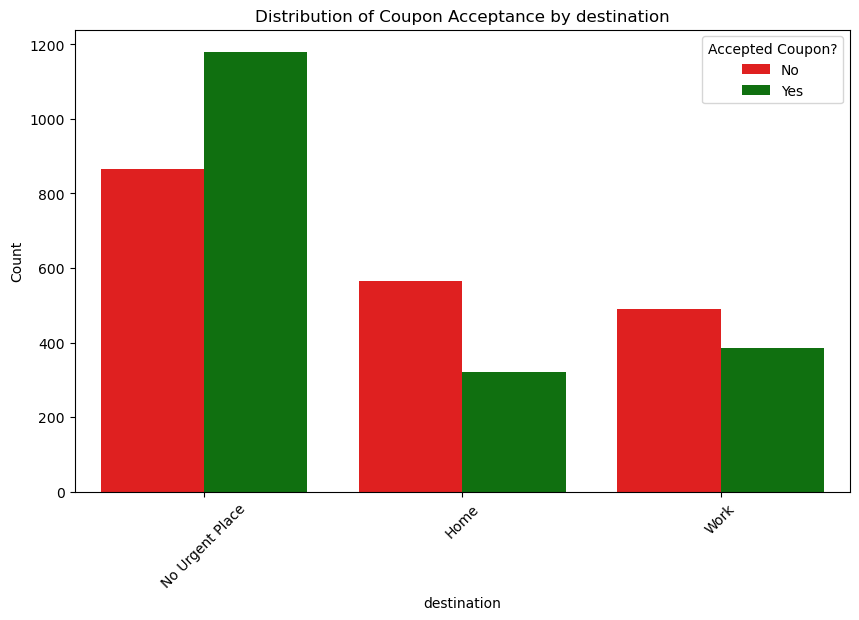

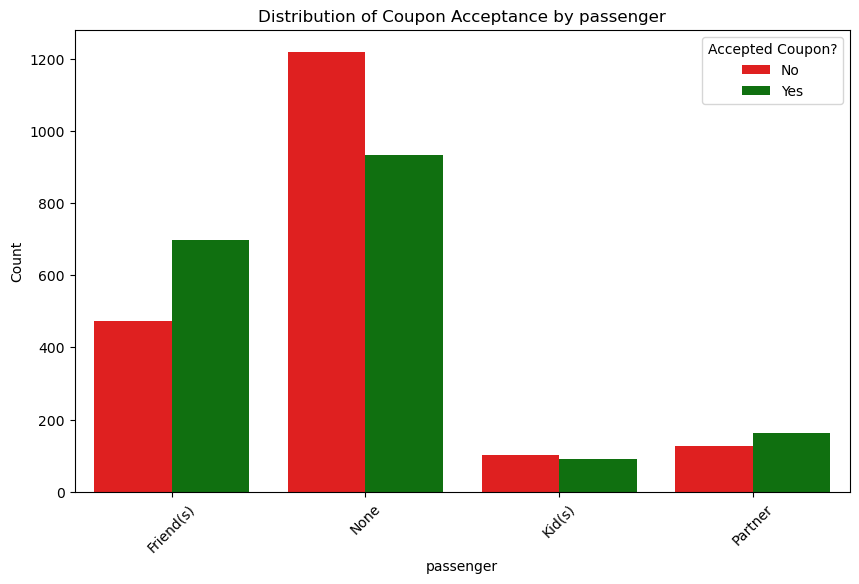

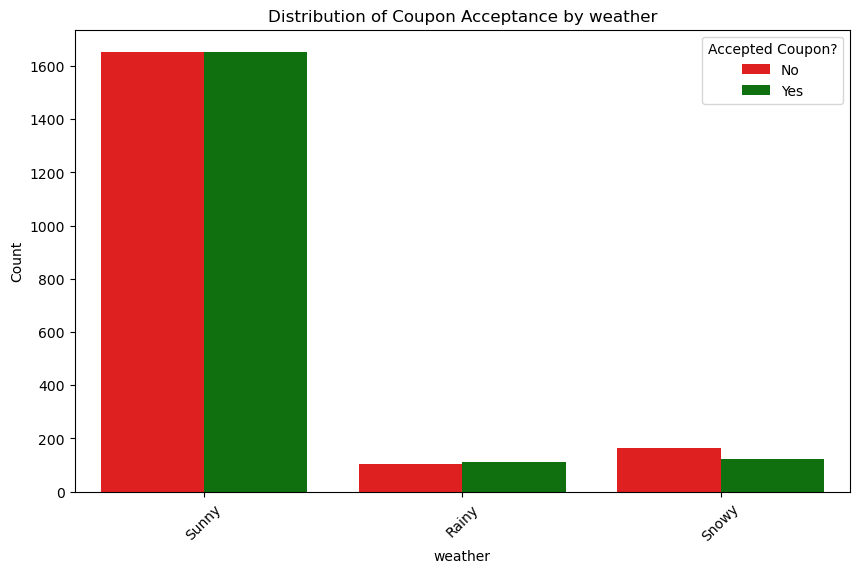

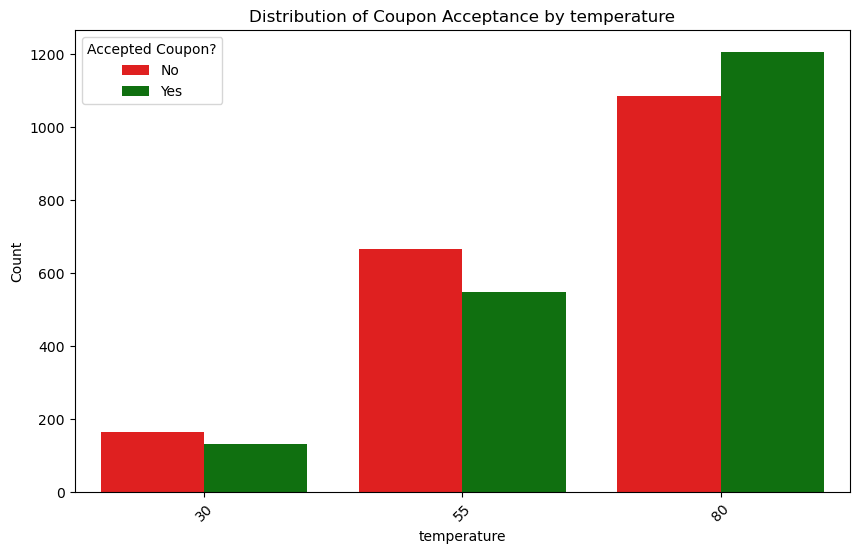

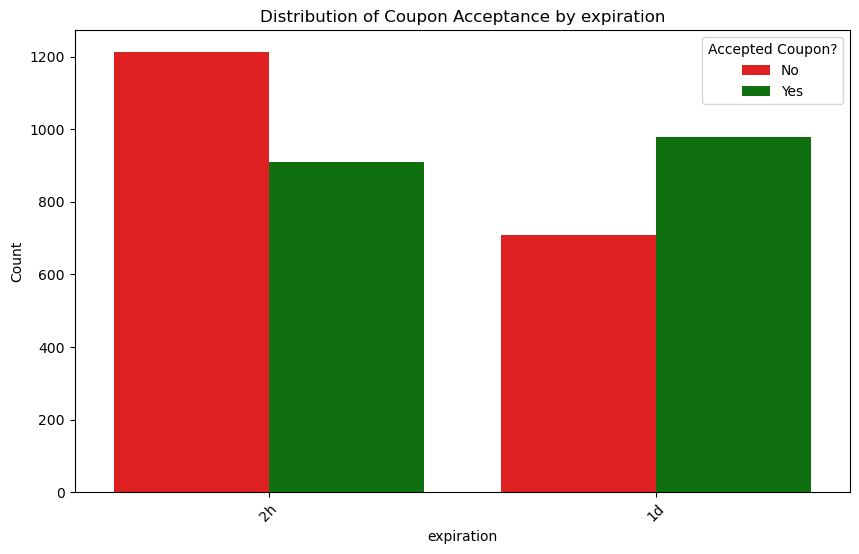

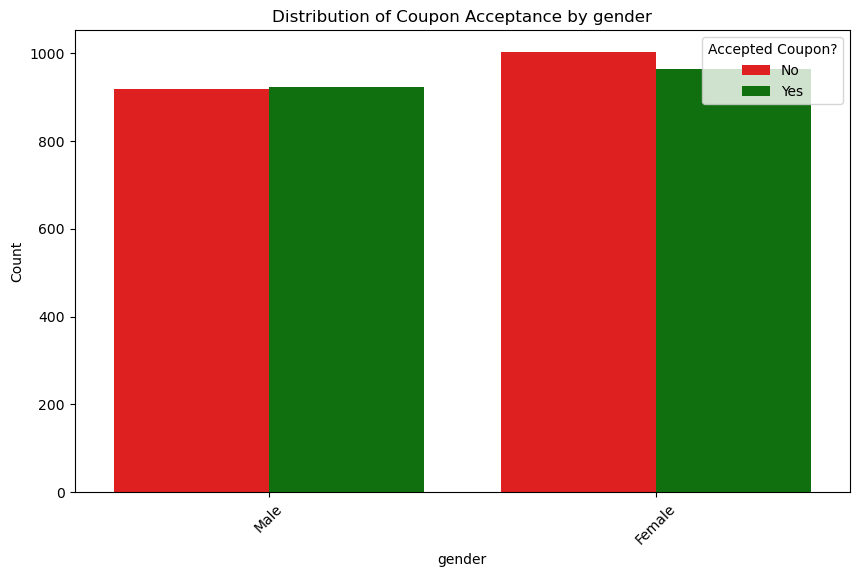

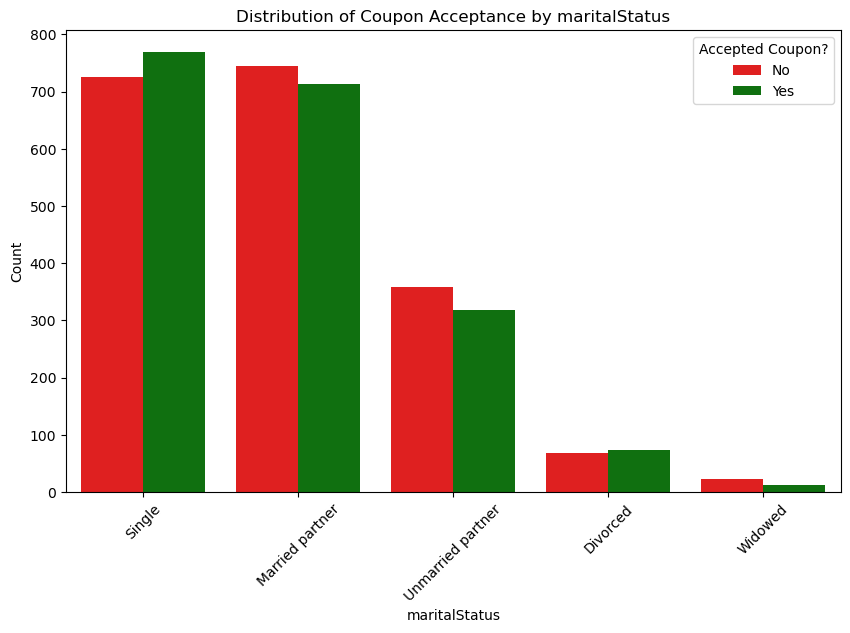

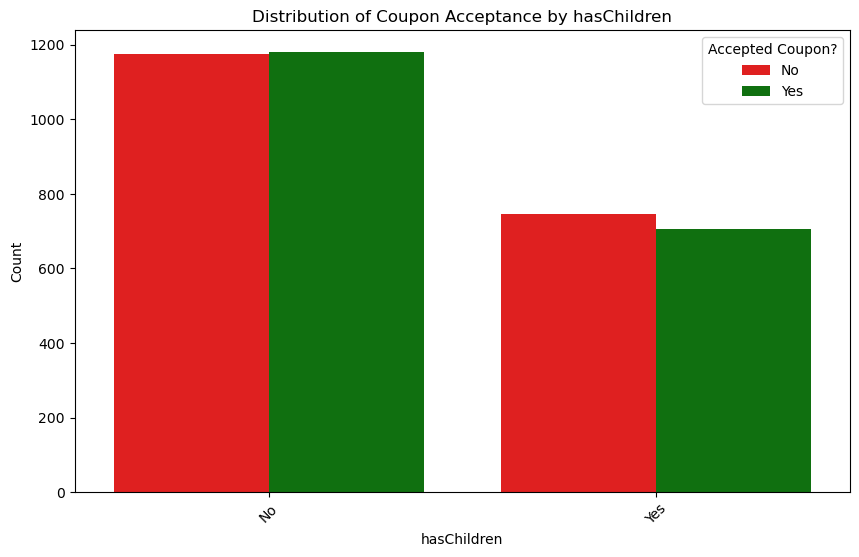

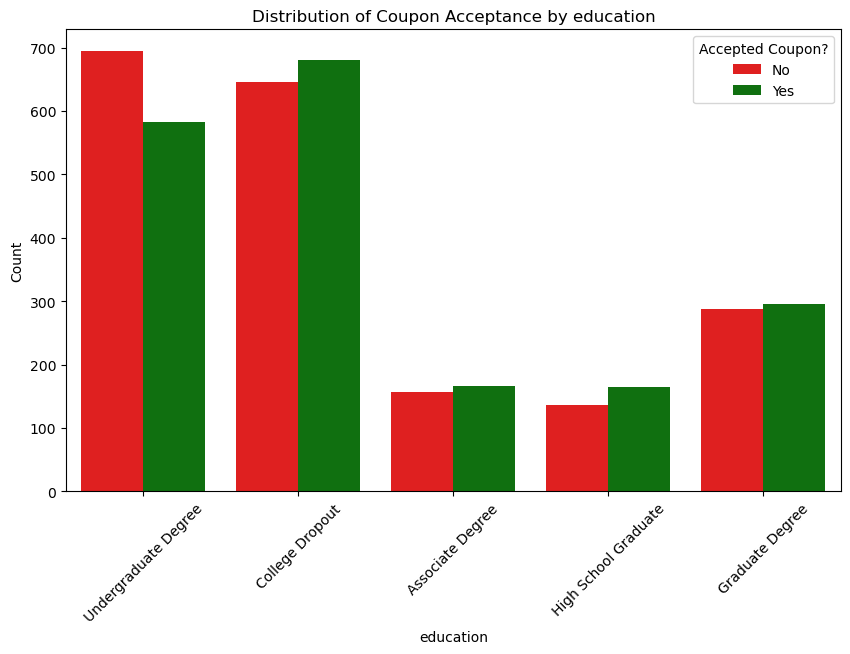

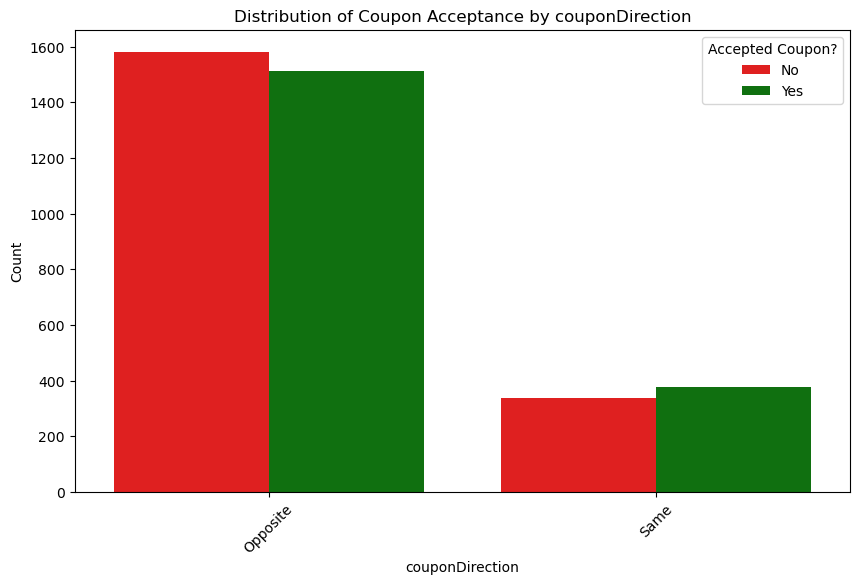

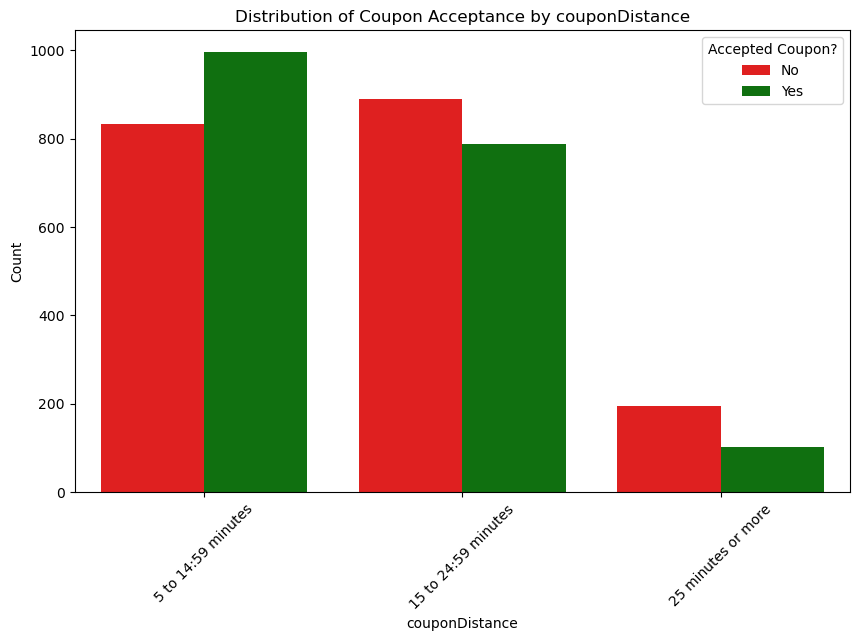

In [585]:
for col in ['destination', 'passenger', 'weather', 'temperature', 'expiration', 'gender',
            'maritalStatus', 'hasChildren', 'education', 'couponDirection', 'couponDistance']:
    plt.figure(figsize=(10,6))
    sns.countplot(data = coffeeHouses, x = col, hue='acceptedCoupon', palette={"Yes": "green", "No": "red"})
    plt.title(f'Distribution of Coupon Acceptance by {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.legend(title='Accepted Coupon?')
    plt.savefig(f'images/coffee-house-coupon-acceptance-by-{col}.png')
    plt.show()

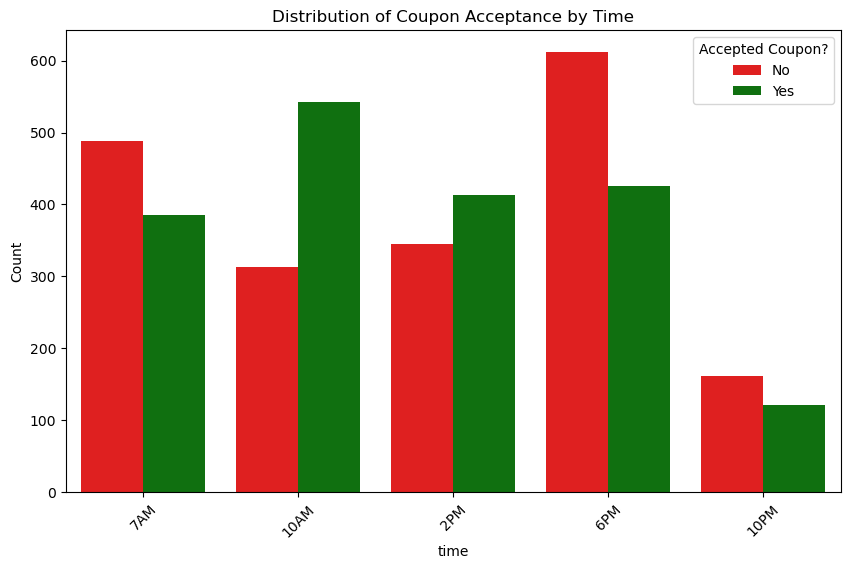

In [586]:
plt.figure(figsize=(10,6))
sns.countplot(data = coffeeHouses,
              x = 'time',
              hue='acceptedCoupon',
              palette={"Yes": "green", "No": "red"},
              order=['7AM', '10AM', '2PM', '6PM', '10PM'])
plt.title(f'Distribution of Coupon Acceptance by Time')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Accepted Coupon?')
plt.savefig(f'images/coffee-house-coupon-acceptance-by-time.png')

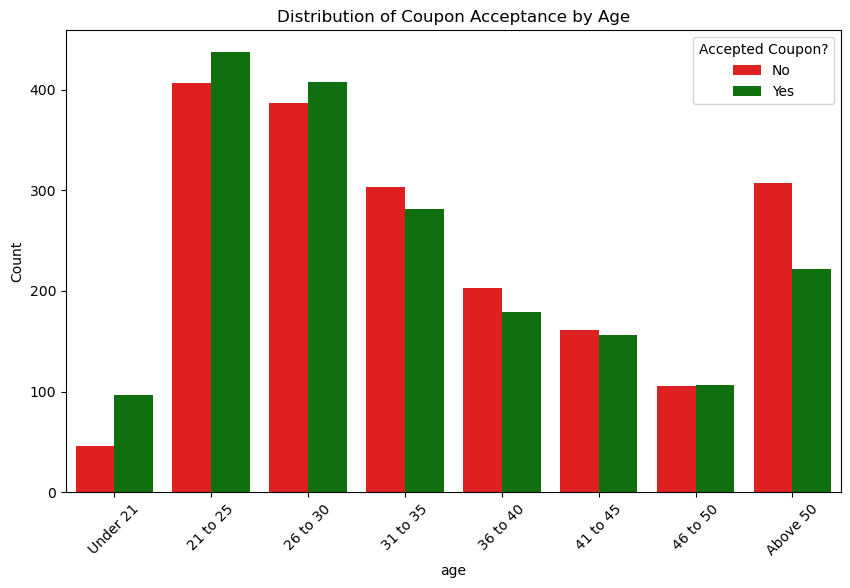

In [587]:
plt.figure(figsize=(10,6))
sns.countplot(data = coffeeHouses,
              x = 'age',
              hue='acceptedCoupon',
              palette={"Yes": "green", "No": "red"},
              order=['Under 21', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 45', '46 to 50', 'Above 50'])
plt.title(f'Distribution of Coupon Acceptance by Age')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Accepted Coupon?')
plt.savefig(f'images/coffee-house-coupon-acceptance-by-age.png')

In [588]:
data['income'].value_counts()

income
$25000 - $37499     1912
$12500 - $24999     1722
$37500 - $49999     1680
$100000 or More     1673
$50000 - $62499     1561
Less than $12500     992
$62500 - $74999      837
$75000 - $87499      813
$87500 - $99999      803
Name: count, dtype: int64

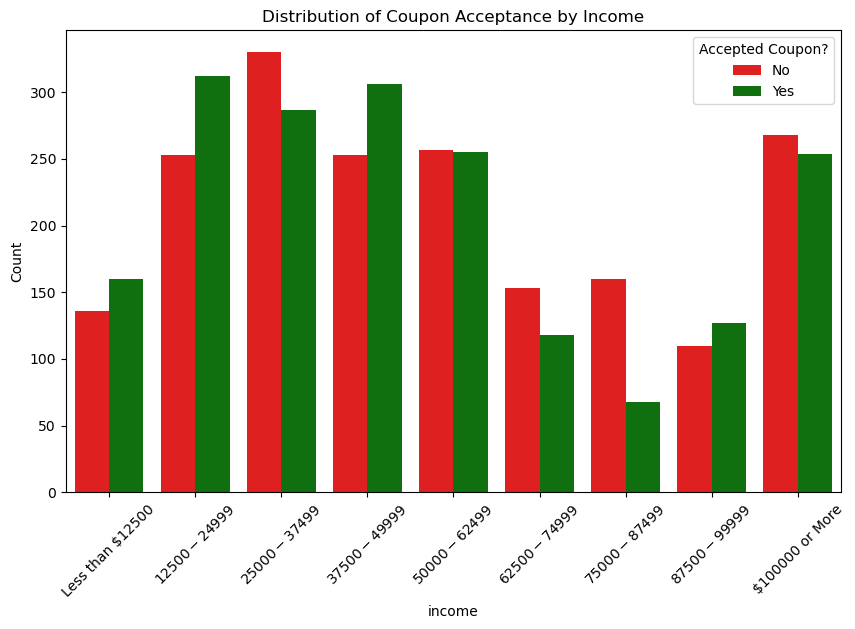

In [589]:
plt.figure(figsize=(10,6))
sns.countplot(data = coffeeHouses,
              x = 'income',
              hue='acceptedCoupon',
              palette={"Yes": "green", "No": "red"},
               order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999',
                      '$75000 - $87499', '$87500 - $99999', '$100000 or More']
             )
plt.title(f'Distribution of Coupon Acceptance by Income')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Accepted Coupon?')
plt.savefig(f'images/coffee-house-coupon-acceptance-by-income.png')

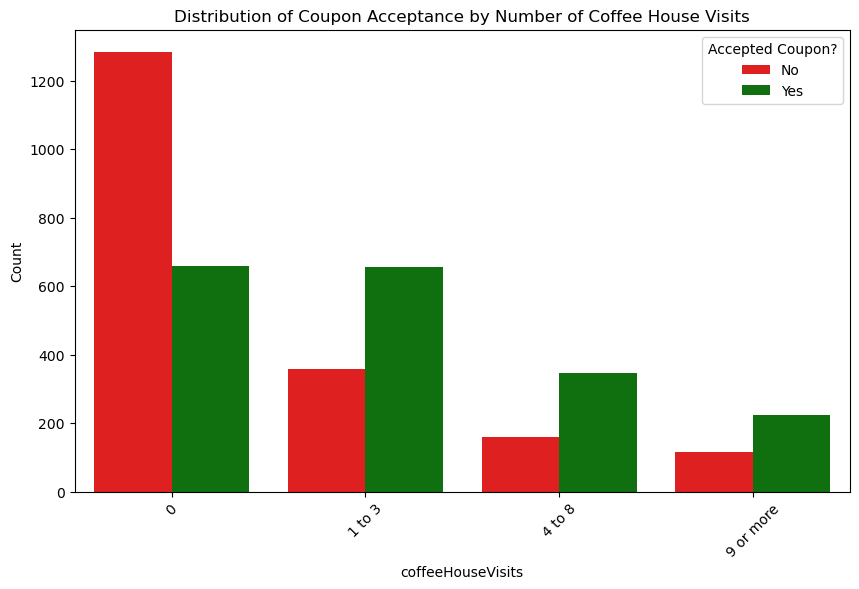

In [590]:
plt.figure(figsize=(10,6))
sns.countplot(data = coffeeHouses,
              x = 'coffeeHouseVisits',
              hue='acceptedCoupon',
              palette={"Yes": "green", "No": "red"},
              order=['0', '1 to 3', '4 to 8', '9 or more'])
plt.title(f'Distribution of Coupon Acceptance by Number of Coffee House Visits')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Accepted Coupon?')
plt.savefig(f'images/coffee-house-coupon-acceptance-by-coffeeHouseVisits.png')

**Initial Findings**

Each of the above figures suggests something about coffee house coupons. In order, by figure:

- Drivers are more likely to accept them when heading to no urgent place, and reject them when they are heading home or to work.
- Drivers are more likely to accept them when driving with friends or their partner, than when driving alone or with kids.
- The weather has very little impact on coffee house coupon acceptance.
- Drivers are more likely to accept them when the temperature is 80F than when it is 30F or 55F.
- Drivers are more likely to accept coupons with a longer expiration time than a shorter one.
- Drivers gender seems to have little impact on coffee house coupon acceptance.
- Drivers who are single or divorced are more likely to accept them than ones who are partnered or widowed.
- Drivers parental status seems to have little impact on coffee house coupon acceptance.
- Drivers who have undergraduate degrees are less likely to accept coupons than any other education level.
- Drivers are more likely to accept coupons for coffee houses in the same direction they are headed than ones in the opposite direction.
- Drivers are more likely to accept coupons for coffee houses within a 5 to 15 minute drive than ones further out.
- Drivers are more likely to accept them at 10 AM and 2 PM than at any other time.
- Drivers under the age of 30 are more likely to accept them than drivers above 31. Of the ones under 30, the drivers under 21 are the most likely to accept. Of the ones above 31, the drivers above 50 are the most likely not to accept.
- Drivers who make under \\$24,999, as well as ones who make between \\$37,500 to \\$49,999 and \\$87,500 to \\$99,999, are more likely to accept the coupon than others.
- Drivers who visit coffee houses at all are more likely to accept than ones who do not. This mirrors the conclusions drawn when looking at the bars coupon group.

Let's look a bit closer at the coupon distance & direction by checking their acceptance rates.

In [593]:
coffeeHouseAR = round((coffeeHouses.query('acceptedCoupon == "Yes"').shape[0] / coffeeHouses.shape[0]) * 100, 2)
print(f'Overall, coffee house coupons were accepted {coffeeHouseAR}% of the time.')

Overall, coffee house coupons were accepted 49.57% of the time.


In [594]:
coffeeHouses5To15 = coffeeHouses.query('couponDistance == "5 to 14:59 minutes"')
coffeeHouses15to25 = coffeeHouses.query('couponDistance == "15 to 24:59 minutes"')
coffeeHouses25Plus = coffeeHouses.query('couponDistance == "25 minutes or more"')

coffeeHouse5To15AR = round((coffeeHouses5To15.query('acceptedCoupon == "Yes"').shape[0] / coffeeHouses5To15.shape[0]) * 100, 2)
coffeeHouse15to25AR = round((coffeeHouses15to25.query('acceptedCoupon == "Yes"').shape[0] / coffeeHouses15to25.shape[0]) * 100, 2)
coffeeHouse25PlusAR = round((coffeeHouses25Plus.query('acceptedCoupon == "Yes"').shape[0] / coffeeHouses25Plus.shape[0]) * 100, 2)

print(f'Coffee house coupons located within 5 to 15 minutes were accepted {coffeeHouse5To15AR}% of the time.')
print(f'Coffee house coupons located within 15 to 25 minutes were accepted {coffeeHouse15to25AR}% of the time.')
print(f'Coffee house coupons located 25 minutes or longer away were accepted {coffeeHouse25PlusAR}% of the time.')

Coffee house coupons located within 5 to 15 minutes were accepted 54.43% of the time.
Coffee house coupons located within 15 to 25 minutes were accepted 46.99% of the time.
Coffee house coupons located 25 minutes or longer away were accepted 34.23% of the time.


In [595]:
coffeeHousesSameDir = coffeeHouses.query('couponDirection == "Same"')
coffeeHousesOppDir = coffeeHouses.query('couponDirection == "Opposite"')

coffeeHouseSameDirAR = round((coffeeHousesSameDir.query('acceptedCoupon == "Yes"').shape[0] / coffeeHousesSameDir.shape[0]) * 100, 2)
coffeeHouseOppDirAR = round((coffeeHousesOppDir.query('acceptedCoupon == "Yes"').shape[0] / coffeeHousesOppDir.shape[0]) * 100, 2)

print(f'Coffee house coupons located in the same direction the drivers were headed were accepted {coffeeHouseSameDirAR}% of the time.')
print(f'Coffee house coupons located in the opposite direction than the drivers were headed were accepted {coffeeHouseOppDirAR}% of the time.')

Coffee house coupons located in the same direction the drivers were headed were accepted 52.59% of the time.
Coffee house coupons located in the opposite direction than the drivers were headed were accepted 48.87% of the time.


What about the acceptance rate for coffe house coupons where the coffee house was within 5 to 15 minutes of the driver, and in the same direction they were headed?

In [597]:
coffeeHouse5To15SameDir = coffeeHouses.query('couponDistance == "5 to 14:59 minutes" and couponDirection == "Same"')
coffeeHouse5To15SameDirAR = round((coffeeHouse5To15SameDir.query('acceptedCoupon == "Yes"').shape[0] / coffeeHouse5To15SameDir.shape[0]) * 100, 2)
print(f'Coffee house coupons located within 5 to 15 minutes & in the same direction the drivers were headed were accepted {coffeeHouse5To15SameDirAR}% of the time.')

Coffee house coupons located within 5 to 15 minutes & in the same direction the drivers were headed were accepted 53.3% of the time.
